Maxime BLANCHON

#### *Programmation sur Grille de Calcul - Générateurs de Variables Aléatoires*

# TP3 - Méthodes de Monte-Carlo

↓ Import des bibliothèques utilisées dans les execices ↓

In [1]:
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from typing import Callable, List, Tuple
from itertools import repeat
import seaborn as sns

SIZES = [100, 1000, 10_000, 50_000, 100_000, 500_000, 1_000_000]

## Exercice 1

Calcul de $\pi$ par la méthode du "hit or miss" :

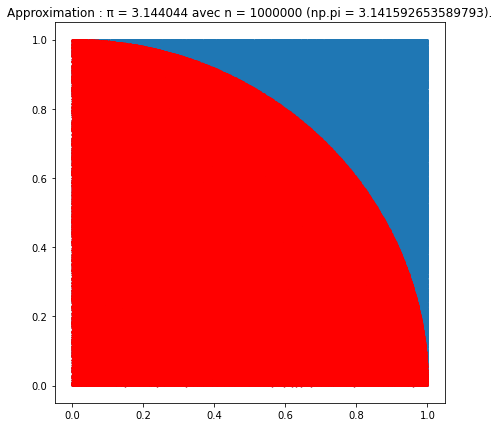

3.144044

In [2]:
def hit_or_miss(n: int, plot: bool = False) -> float:
    x = np.random.uniform(size=n)
    y = np.random.uniform(size=n)

    is_inside = (x * x) + (y * y) < 1
    approx_pi = 4 * np.sum(is_inside) / n

    if plot:
        x_in = x[is_inside]
        y_in = y[is_inside]

        plt.figure(figsize=[7, 7])
        plt.scatter(x, y, s=1)
        plt.scatter(x_in, y_in, color="r", s=1)
        plt.title(f"Approximation : π = {approx_pi} avec n = {n} (np.pi = {np.pi}).")
        plt.show()

    return approx_pi


hit_or_miss(1_000_000, plot=True)

In [3]:
def plot_error_function(approximations: List[float], errors: List[float], title: str) -> None:
    sizes_log = np.log(SIZES)
    plt.scatter(sizes_log, errors, facecolors='none', edgecolors='b', linewidths=2)
    plt.plot(sizes_log, approximations, color='r', label=f'Approximation')
    plt.scatter(sizes_log, approximations, facecolors='none', edgecolors='r', linewidths=2)
    plt.xlabel("Taille de l'échantillon (log)")
    plt.ylabel("Erreur")
    plt.legend()
    plt.title(title)

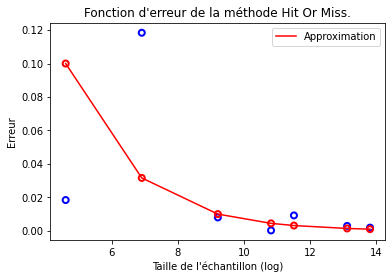

In [4]:
hm_approximations = []
hm_errors = []

for size in SIZES:
    approx = hit_or_miss(size)
    hm_errors.append(abs(approx - np.pi))
    hm_approximations.append(1 / sqrt(size))

plot_error_function(hm_approximations, hm_errors, "Fonction d'erreur de la méthode Hit Or Miss.")

## Exercice 2



**Question 1 :**

En effectuant les changements de variables suivant :
- $u=arcsin(x)$,
- $du = \frac {1} {\sqrt {1 - x^2}}$,

nous trouvons $J = 0.602845$.

In [5]:
J_VALUE = 0.602845

**Question 2 :**

In [6]:
def integral_j(x: float) -> float:
    return (1 / 2) * (np.exp(np.arcsin(x))) * (x / np.sqrt(1 - (x * x)))


def monte_carlo(a: float, b: float, n: int, f: Callable) -> float:
    mc_sum = 0
    for i in range(n):
        mc_sum += f(np.random.uniform(a, b))
    return (b - a) * mc_sum / n


print(f'[Monte Carlo] Estimation : J = {monte_carlo(0.1, 0.9, 100_000, integral_j)} (pour n = {100_000})')

[Monte Carlo] Estimation : J = 0.6045200635047462 (pour n = 100000)


**Question 3 :**

In [7]:
f_monte_carlo = []
for n in SIZES:
    res = monte_carlo(0.1, 0.9, n, integral_j)
    f_monte_carlo.append(res)
    print(f'[Monte Carlo] Estimation : J = {res}  (pour n = {n})')

[Monte Carlo] Estimation : J = 0.5162841136753039  (pour n = 100)
[Monte Carlo] Estimation : J = 0.5876622215104784  (pour n = 1000)
[Monte Carlo] Estimation : J = 0.6007130515184864  (pour n = 10000)
[Monte Carlo] Estimation : J = 0.603440295847581  (pour n = 50000)
[Monte Carlo] Estimation : J = 0.6020611712440466  (pour n = 100000)
[Monte Carlo] Estimation : J = 0.6025733733497666  (pour n = 500000)
[Monte Carlo] Estimation : J = 0.6036348117630268  (pour n = 1000000)


On peut voir qu'en fonction du nombre de valeurs simulées $n$, la valeur de l'intégrale J converge vers sa véritable valeur, calculée à la question 1. 

**Question 4 :**

In [8]:
def rectangles_method(a: float, b: float, n: int, f: Callable) -> float:
    rec_sum = 0
    h = (b - a) / n

    for k in range(n - 1):
        rec_sum += f(a + k * h)

    return h * rec_sum

In [9]:
f_rectangle = []
for n in SIZES:
    res = rectangles_method(0.1, 0.9, n, integral_j)
    f_rectangle.append(res)
    print(f'[Rectangles Method] Estimation : J = {res}  (pour n = {n})')

[Rectangles Method] Estimation : J = 0.5667942925845  (pour n = 100)
[Rectangles Method] Estimation : J = 0.5990893619507717  (pour n = 1000)
[Rectangles Method] Estimation : J = 0.6024682238648716  (pour n = 10000)
[Rectangles Method] Estimation : J = 0.6027699557026537  (pour n = 50000)
[Rectangles Method] Estimation : J = 0.6028076882127177  (pour n = 100000)
[Rectangles Method] Estimation : J = 0.6028378767870706  (pour n = 500000)
[Rectangles Method] Estimation : J = 0.6028416505193059  (pour n = 1000000)


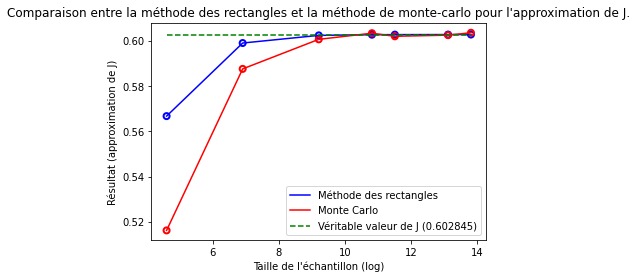

In [10]:
def plot_values(f1: List[float], f2: List[float]) -> None:
    sizes_log = np.log(SIZES)
    plt.plot(sizes_log, f1, color='blue', label='Méthode des rectangles')
    plt.scatter(sizes_log, f1, facecolors='none', edgecolors='b', linewidths=2)
    plt.plot(sizes_log, f2, color='red', label='Monte Carlo')
    plt.scatter(sizes_log, f2, facecolors='none', edgecolors='r', linewidths=2)
    line = list(repeat(J_VALUE, len(SIZES)))
    plt.plot(sizes_log, line, linestyle='dashed', color='green', label=f'Véritable valeur de J ({J_VALUE})')
    plt.xlabel("Taille de l'échantillon (log)")
    plt.ylabel("Résultat (approximation de J)")
    plt.legend()
    plt.title("Comparaison entre la méthode des rectangles et la méthode de monte-carlo pour l'approximation de J.")


plot_values(f_rectangle, f_monte_carlo)

La méthode de quadrature (dans notre cas la méthode des rectangles) converge plus rapidement que la méthode de Monte Carlo.

**Question 5 :**

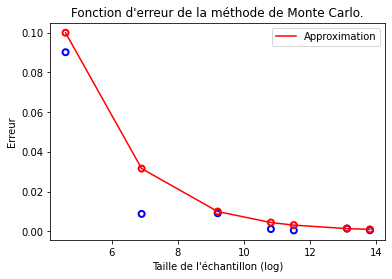

In [11]:
mc_approximations = []
mc_errors = []

for size in SIZES:
    approx = monte_carlo(0.1, 0.9, size, integral_j)
    error = abs(approx - J_VALUE)
    mc_errors.append(error)
    mc_approximations.append(1 / sqrt(size))

plot_error_function(mc_approximations, mc_errors, "Fonction d'erreur de la méthode de Monte Carlo.")

**Question 6 :**

In [12]:
def batchs_method(m, n):
    batch_len = int(n / m)
    batches = []

    for i in range(m):
        batches.append(monte_carlo(0.1, 0.9, batch_len, integral_j))

    return batches, sum(batches) / m


batches, avg = batchs_method(5000, 1_000_000)
print(f'Evaluation Monte Carlo de J = {avg}')

Evaluation Monte Carlo de J = 0.6029740375639142


Text(0.5, 1.0, 'Histogramme et courbe de densité des résultats des batchs.')

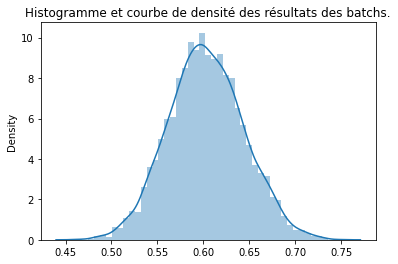

In [13]:
sns.distplot(batches)
plt.title('Histogramme et courbe de densité des résultats des batchs.')

= on se rapproche du théorème central limite

**Question 7 :** TODO

## Exercice 3

**Question 1 :**

La valeur de l'intégrale I est 0.159491.

In [14]:
I_VALUE = 0.159491

**Question 2 :**

In [15]:
def integral_i(x: int, y: int) -> float:
    return x * y * np.sin(1 / (x * y)) ** 2


def monte_carlo_bidimensional(a: float, b: float, n: int, f: Callable) -> float:
    mc_sum = 0
    for i in range(n):
        mc_sum += f(np.random.uniform(a, b), np.random.uniform(a, b))
    return (b - a) * mc_sum / n


print(f'[Monte Carlo] Estimation : J = {monte_carlo_bidimensional(0, 1, 100_000, integral_i)} (pour n = {100_000})')

[Monte Carlo] Estimation : J = 0.15984504250340534 (pour n = 100000)


**Question 3 :**

In [16]:
f_monte_carlo_bi = []
for n in SIZES:
    res = monte_carlo_bidimensional(0, 1, n, integral_i)
    f_monte_carlo_bi.append(res)
    print(f'[Monte Carlo] Estimation : J = {res} (pour n = {n})')

[Monte Carlo] Estimation : J = 0.1415876927889493 (pour n = 100)
[Monte Carlo] Estimation : J = 0.16137987497921616 (pour n = 1000)
[Monte Carlo] Estimation : J = 0.159446386900726 (pour n = 10000)
[Monte Carlo] Estimation : J = 0.16152267441740079 (pour n = 50000)
[Monte Carlo] Estimation : J = 0.16007094599984362 (pour n = 100000)
[Monte Carlo] Estimation : J = 0.15899086236183746 (pour n = 500000)
[Monte Carlo] Estimation : J = 0.15958699254951353 (pour n = 1000000)


**Question 4 :**

In [17]:
# TODO
def integrale2(N):
    dx = 1 / N

    def g(i, j):
        return (i * j * dx * dx) * (np.sin(1 / (i * j * dx * dx))) ** 2

    g = np.fromfunction(g, (N, N))
    clean_x = g[np.isnan(g) == False]
    return abs(clean_x.sum() * (1 / N) ** 2)


integrale2(10000)

0.15945294248866315

**Question 5 :**

Nombre de tirages n = 100, erreur numérique = 0.021472504458924374
Nombre de tirages n = 1000, erreur numérique = 0.0069206552701896185
Nombre de tirages n = 10000, erreur numérique = 0.0006763646214759667
Nombre de tirages n = 50000, erreur numérique = 0.00019144482821922826
Nombre de tirages n = 100000, erreur numérique = 0.0005248230946036103
Nombre de tirages n = 500000, erreur numérique = 3.4153621586624494e-05
Nombre de tirages n = 1000000, erreur numérique = 7.91006798818994e-05


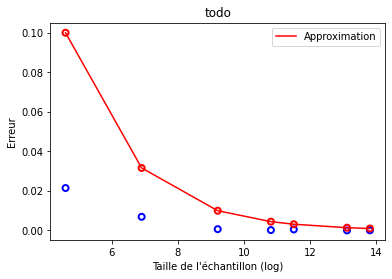

In [20]:
mcb_approximations = []
mcb_errors = []

for size in SIZES:
    approx = monte_carlo_bidimensional(0, 1, size, integral_i)
    error = abs(approx - I_VALUE)
    mcb_errors.append(error)
    mcb_approximations.append(1 / sqrt(size))
    print(f'Nombre de tirages n = {size}, erreur numérique = {error}')

plot_error_function(mcb_approximations, mcb_errors, "todo")

**Question 6 :**

In [21]:
def batch(m: int, n: int) -> Tuple[List[List[float]], float]:
    batch_len = int(n / m)
    batches = []

    for i in range(m):
        batches.append(monte_carlo_bidimensional(0, 1, batch_len, integral_i))

    return batches, sum(batches) / m


batches, avg = batch(5000, 1_000_000)
print(f'Evaluation Monte Carlo de I = {avg}')

Evaluation Monte Carlo de I = 0.15950863651162958


Text(0.5, 1.0, 'Histogramme et courbe de densité des résultats des batchs.')

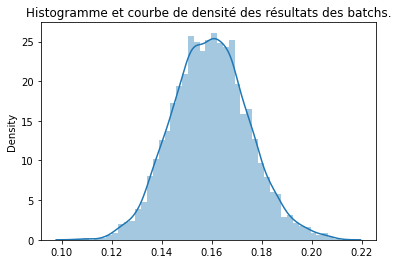

In [22]:
sns.distplot(batches)
plt.title('Histogramme et courbe de densité des résultats des batchs.')